In [10]:
import itertools
from tqdm import tqdm
from math import *
import matplotlib
from matplotlib import pyplot as plt
from multiprocessing import Pool
from qutip import *
import numpy as np

font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 6, 5
plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-whitegrid')

In [11]:
def Ncm(N, m):
    return factorial(N)/(factorial(N-m)*factorial(m))

In [12]:
def get_basis(seq):
    N = len(seq)
    seq = np.array(seq)
    if len(seq) == 1:
        par = 1
    else:
        inv = 0
        for i in range(len(seq)-1):
            inv += sum(seq[i] > seq[i+1:])
        par = 1 if inv % 2 == 0 else -1
    base = [basis(N,i) for i in seq]
    return par*tensor(base)/sqrt(factorial(N))

6


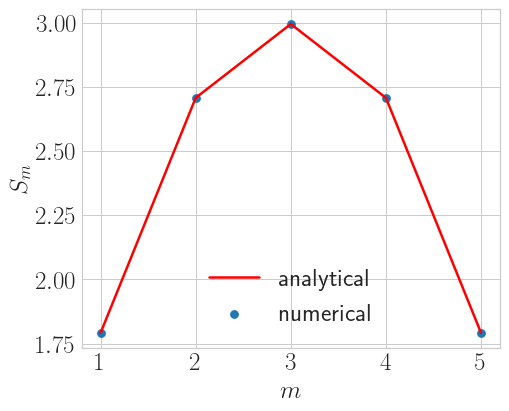

In [18]:
for N in [6]:
    print (N)
    color = ["r", "g", "b"][int(N/5)-1]
    sequences = np.array(list(itertools.permutations(range(N))))
    states = []
    states = Pool(processes=3).map(get_basis, sequences)

    gs = Qobj(sum(states))
    den_m = gs*gs.dag()
    vne = []
    for i in range(1, N):
        den_m = den_m.ptrace(range(1,N-i+1))
        vne.append(entropy_vn(den_m))
    plt.scatter(range(1, N), vne, label="numerical")
    formula = [Ncm(N,m) for m in range(1,N)]
    plt.plot(range(1, N), np.log(formula), label="analytical", color="r")
    plt.xlabel(r"$m$")
    plt.ylabel(r"$S_m$")
    plt.legend()
    plt.show()